In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [2]:
# in this window, you put the correct parameters !!!

r, K = 1.3, 7000
E =  1.1
w, b, p, C = 0.5, 0.0002, 30, 20 

In [3]:
Y = lambda N: E*N
Ndot = lambda N: r*(1 - N/K)*N
Nstar = lambda : K*(1 - E/r)
PI = lambda N: p*b*N - C # profit

def deriv(state, t, *params):
    N, A = state
    r, K, E, w, b, p = params
    # dN_dt = (r*(1 - N/K) - E)*N 
    dN_dt = Ndot(N) - Y(N)
    dA_dt = w*PI(N)/C
    return np.array([dN_dt, dA_dt])

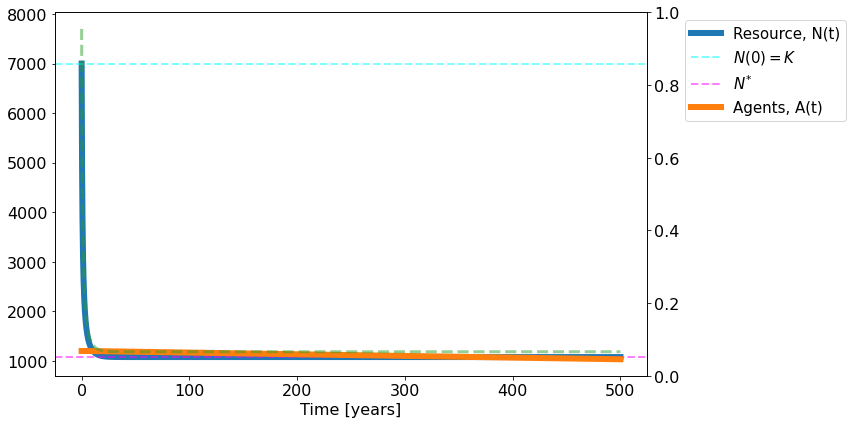

In [4]:
init_state = [K, 1200]
t_end = 500
t = np.linspace(0, t_end, 10*int(t_end))

params = (r, K, E, w, b, p )
sol = odeint(deriv, init_state, t, params).T
N, A = sol

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
# ax1.grid()

ax1.plot(t, N, label="Resource, N(t)")
ax1.axhline(N[0], alpha=0.5, linestyle="--", color="cyan", linewidth=2, label="$N(0) = K$")
ax1.axhline(Nstar(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, label="$N^{*}$")
ax1.plot(t, A, label="Agents, A(t)")

# ax1.set_ylabel('Resources [FILL]')
# ax2.set_ylabel('Agents [FILL]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.5, fontsize=15) 

ax1.plot(t, Y(N), label="Yield", linewidth=3, alpha=0.5, linestyle="--")

#fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
#plt.plot(N, A)

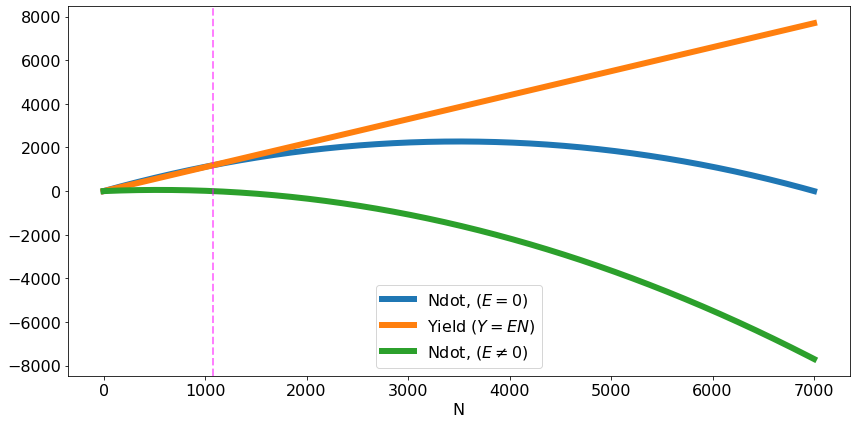

In [5]:
ns = np.linspace(0, K, 1001)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax1.plot(ns, Ndot(ns), label="Ndot, ($E = 0$)")
ax1.plot(ns, Y(ns), label="Yield ($Y = E N$)")
ax1.plot(ns, Ndot(ns) - Y(ns), label="Ndot, ($E \\neq 0$)")

ax1.axvline(Nstar(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, )
ax1.set_xlabel('N') 
ax1.legend()

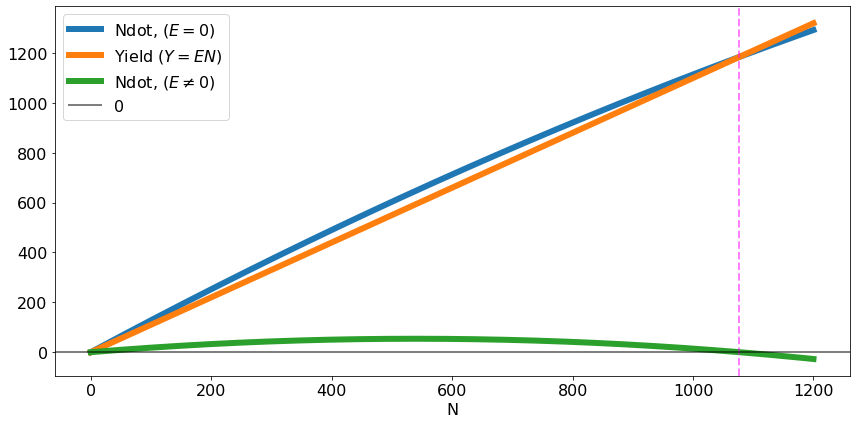

In [6]:
ns = np.linspace(0, 1200, 1001)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax1.plot(ns, Ndot(ns), label="Ndot, ($E = 0$)")
ax1.plot(ns, Y(ns), label="Yield ($Y = E N$)")
ax1.plot(ns, Ndot(ns) - Y(ns), label="Ndot, ($E \\neq 0$)")

ax1.axvline(Nstar(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, )
ax1.axhline(0, alpha=0.5, linestyle="-", color="black", linewidth=2, label="0")

ax1.set_xlabel('N') 
ax1.legend()


In [7]:
Y = lambda N, A: b*N*A
Ndot = lambda N: r*(1 - N/K)*N
Nstar_pred = lambda : C/(p*b)
Astar_pred = lambda Nst: (r/b)*(1-Nst/(K))
PI = lambda n: p*b*n - C # profit

def deriv_pred(state, t, *params):
    N, A = state
    r, K, E, w, b, p = params
    # dN_dt = (r*(1 - N/K) - E)*N 
    dN_dt = Ndot(N) - Y(N, A)
    dA_dt = w*PI(N)/C
    return np.array([dN_dt, dA_dt])

Text(0, 0.5, 'A(t)')

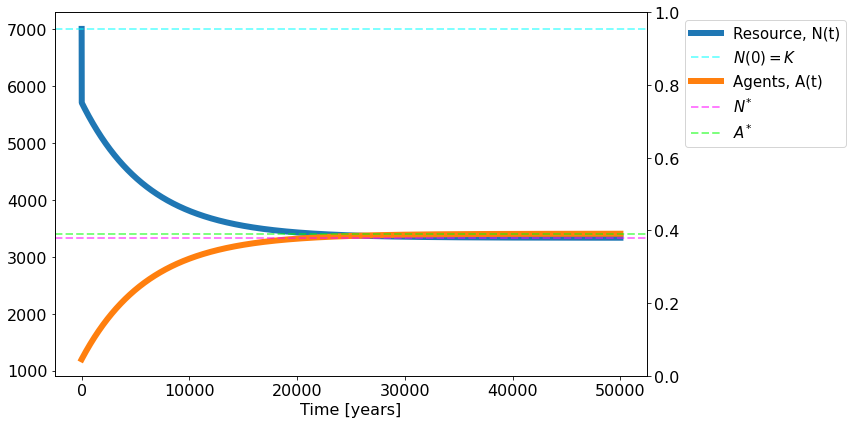

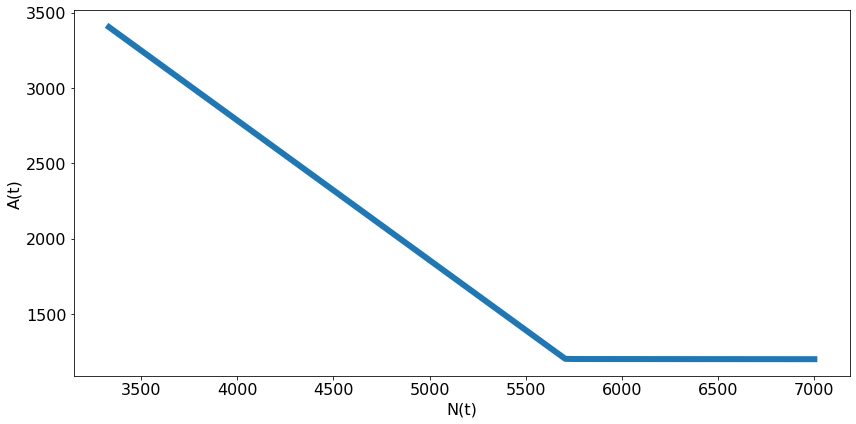

In [9]:
init_state = [K, 1200]
t_end = 50000
t = np.linspace(0, t_end, 10*int(t_end))

params = (r, K, E, w, b, p )
sol = odeint(deriv_pred, init_state, t, params).T
N, A = sol

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
# ax1.grid()

ax1.plot(t, N, label="Resource, N(t)")
ax1.axhline(N[0], alpha=0.5, linestyle="--", color="cyan", linewidth=2, label="$N(0) = K$")
ax1.plot(t, A, label="Agents, A(t)")
ax1.axhline(Nstar_pred(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, label="$N^{*}$")
ax1.axhline(Astar_pred(Nstar_pred()), alpha=0.5, linestyle="--", color="lime", linewidth=2, label="$A^{*}$")

# ax1.set_ylabel('Resources [FILL]')
# ax2.set_ylabel('Agents [FILL]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.5, fontsize=15) 

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax1.plot(N, A)
ax1.set_xlabel('N(t)') 
ax1.set_ylabel('A(t)') 


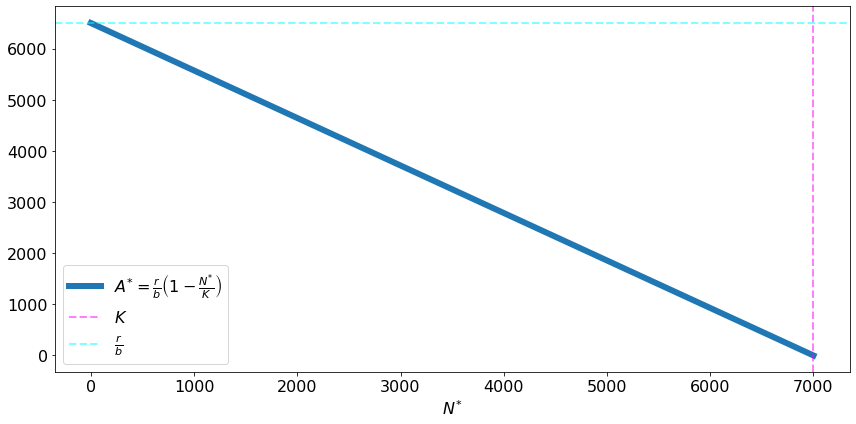

In [48]:
ns = np.linspace(0, K, 1001)

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax1.plot(ns, Astar_pred(ns), label="$A^{*} = \\frac{r}{b} \\left( 1- \\frac{N^{*}}{K} \\right)$")
ax1.axvline(K, alpha=0.5, linestyle="--", color="magenta", linewidth=2, label="$K$")
ax1.axhline(r/b, alpha=0.5, linestyle="--", color="cyan", linewidth=2, label="$\\frac{r}{b}$")
ax1.set_xlabel("$N^{*}$")
ax1.legend()

In [49]:
Y = lambda : 700*E ## TODO: choose parameters wisely!
Ndot = lambda N: r*(1 - N/K)*N
Nstar_const_Y = lambda : (1/2)*(K + np.sqrt((K*K) - 4*K*Y()/r))
# Astar_const_Y = lambda Nst: (r/b)*(1-Nst/(K))
#PI = lambda n: p*b*n - C # profit

def deriv_const_Y(state, t, *params):
    N, A = state
    r, K, E, w, b, p = params
    # dN_dt = (r*(1 - N/K) - E)*N 
    dN_dt = Ndot(N) - Y()
    dA_dt = w*PI(N)/C
    return np.array([dN_dt, dA_dt])

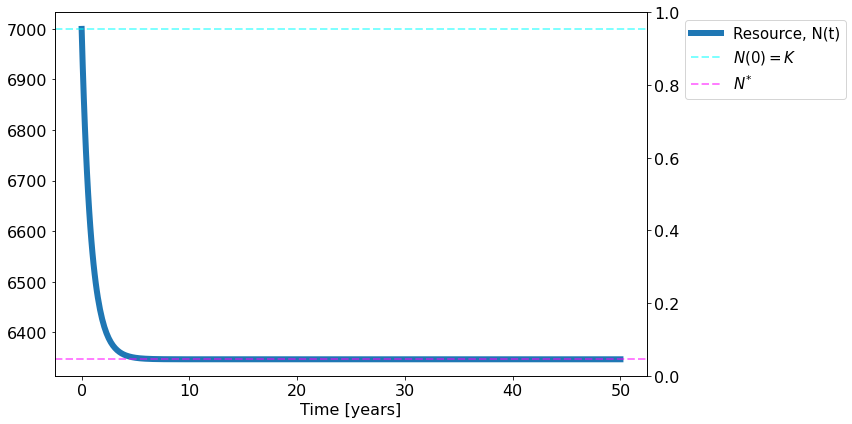

In [50]:
init_state = [K, 1200]
t_end = 50
t = np.linspace(0, t_end, 10*int(t_end))

params = (r, K, E, w, b, p)
sol = odeint(deriv_const_Y, init_state, t, params).T
N, A = sol

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax2 = ax1.twinx()
# ax1.grid()

ax1.plot(t, N, label="Resource, N(t)")
ax1.axhline(N[0], alpha=0.5, linestyle="--", color="cyan", linewidth=2, label="$N(0) = K$")
# ax1.plot(t, A, label="Agents, A(t)")
ax1.axhline(Nstar_const_Y(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, label="$N^{*}$")
#ax1.axhline(Astar_pred(Nstar_pred()), alpha=0.5, linestyle="--", color="lime", linewidth=2, label="$A^{*}$")

# ax1.set_ylabel('Resources [FILL]')
# ax2.set_ylabel('Agents [FILL]', color = 'mediumseagreen') 
ax1.set_xlabel('Time [years]') 

ax1.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.5, fontsize=15) 

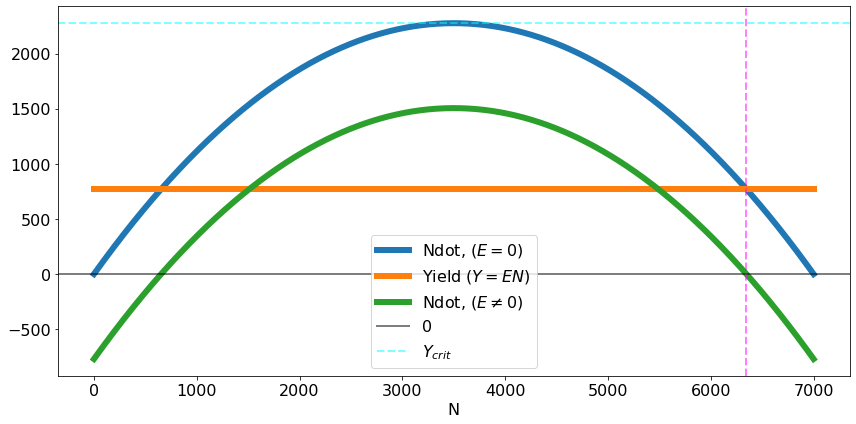

In [57]:
ns = np.linspace(0, K, 1001)

Y_crit = K*r/4 # for higher yields than y_crit, 
                    # no real solutions exists => no stabile real fixed-points, 
                    # everything is exterminated

fig, ax1 = plt.subplots(1,1, figsize=(12, 6), tight_layout=True)
ax1.plot(ns, Ndot(ns), label="Ndot, ($E = 0$)")
ax1.plot(ns, [Y()]*len(ns), label="Yield ($Y = E N$)")
ax1.plot(ns, Ndot(ns) - Y(), label="Ndot, ($E \\neq 0$)")
ax1.axhline(0, alpha=0.5, linestyle="-", color="black", linewidth=2, label="0")
ax1.axhline(Y_crit, alpha=0.5, linestyle="--", color="cyan", linewidth=2, label="$Y_{crit}$")
# ax1.plot(ns, Ndot(ns) - Y(), label="Ndot, ($E \\neq 0$)")

ax1.axvline(Nstar_const_Y(), alpha=0.5, linestyle="--", color="magenta", linewidth=2, )
ax1.set_xlabel('N') 
ax1.legend()